In [1]:
import numpy as np 
import pandas as pd 
import re ## it used to work on String
import nltk # text mining
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel("D:\\snap_tweets2.xlsx")
#df = pd.read_excel('File.xlsx', sheetname='Sheet1')

In [3]:
df.head()

,Unnamed: 0,tweet_id,text,user,created,full_text
0,0,1346032061002309633,Fastest Delivery by Snapdeal! UnBox Jindagi wi...,AKHTARK15389151,Mon Jan 04 09:53:46 +0000 2021,Fastest Delivery by Snapdeal! UnBox Jindagi wi...
1,1,1345980077134082048,@Snapdeal_Help This is serious. For a non tech...,nigeldcruz7,Mon Jan 04 06:27:12 +0000 2021,@Snapdeal_Help This is serious. For a non tech...
2,2,1345976657790738434,Hi @snapdeal I've received post mail &amp; s...,nigeldcruz7,Mon Jan 04 06:13:36 +0000 2021,Hi @snapdeal I've received post mail &amp; s...
3,3,1345969280160911362,Still there is no reply and no response from t...,KapporKaran,Mon Jan 04 05:44:17 +0000 2021,Still there is no reply and no response from t...
4,4,1345928761380806656,@snapdeal @Snapdeal_Help when I contact your c...,Ashlish_,Mon Jan 04 03:03:17 +0000 2021,@snapdeal @Snapdeal_Help when I contact your c...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3000 non-null   int64 
 1   tweet_id    3000 non-null   int64 
 2   text        3000 non-null   object
 3   user        3000 non-null   object
 4   created     3000 non-null   object
 5   full_text   3000 non-null   object
dtypes: int64(2), object(4)
memory usage: 140.8+ KB


In [5]:
df=df.drop(df[["Unnamed: 0","text","created","user","tweet_id"]],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  3000 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


In [7]:
df.head()

,full_text
0,Fastest Delivery by Snapdeal! UnBox Jindagi wi...
1,@Snapdeal_Help This is serious. For a non tech...
2,Hi @snapdeal I've received post mail &amp; s...
3,Still there is no reply and no response from t...
4,@snapdeal @Snapdeal_Help when I contact your c...


In [8]:
df.iloc[0,0]

'Fastest Delivery by Snapdeal! UnBox Jindagi with #SnapdealDeliversFastest #UnboxHappiness @Snapdeal'

In [9]:
characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}

In [10]:
df['full_text'] = (df['full_text'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space
                              .replace(characterMap, regex=True) ### used to find pattern n replace
                              .str.normalize('NFKD') ### never skip the letter
                              .str.encode('ascii', errors='ignore') # convert in programming language & not readable for human
                              .str.decode('utf-8')) # is to convert into read able format for machine & human

In [11]:
df.iloc[0,0]

'Fastest Delivery by Snapdeal! UnBox Jindagi with #SnapdealDeliversFastest #UnboxHappiness @Snapdeal'

In [12]:
df.full_text=df.full_text.str.lower()

In [13]:

df.iloc[0,0]

'fastest delivery by snapdeal! unbox jindagi with #snapdealdeliversfastest #unboxhappiness @snapdeal'

In [14]:
df['full_text'] = df['full_text'].str.replace(r'@\S+|http\S+|www.\S+','',case=False)
df.iloc[0,0]

'fastest delivery by snapdeal! unbox jindagi with #snapdealdeliversfastest #unboxhappiness '

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuation(full_text):
    text_nopunt="".join([c for c in full_text if c not in string.punctuation])
    return text_nopunt

In [17]:
df['full_text']=df['full_text'].apply(lambda x : remove_punctuation(x))

In [18]:
df.iloc[0,0]

'fastest delivery by snapdeal unbox jindagi with snapdealdeliversfastest unboxhappiness '

In [19]:
df

,full_text
0,fastest delivery by snapdeal unbox jindagi wit...
1,this is serious for a non technical user it l...
2,hi ive received post mail amp scratch card ...
3,still there is no reply and no response from t...
4,when i contact your customer service for hel...
...,...
2995,i had received empty box what is this...
2996,i had received empty box what is this ...
2997,i had received empty box what is this ...
2998,i had received empty box what is this...


In [20]:
df['full_text'] = df['full_text'].str.replace('\d+', '')
df['full_text'] = df['full_text'].str.replace('\+', '')
df['full_text'] = df['full_text'].str.replace('\n', '')

In [21]:
df.iloc[0,0]

'fastest delivery by snapdeal unbox jindagi with snapdealdeliversfastest unboxhappiness '

In [22]:
df

,full_text
0,fastest delivery by snapdeal unbox jindagi wit...
1,this is serious for a non technical user it l...
2,hi ive received post mail amp scratch card ...
3,still there is no reply and no response from t...
4,when i contact your customer service for hel...
...,...
2995,i had received empty box what is this...
2996,i had received empty box what is this ...
2997,i had received empty box what is this ...
2998,i had received empty box what is this...


In [23]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['full_text'] = df['full_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [25]:
df.iloc[0,0]

'fastest delivery snapdeal unbox jindagi snapdealdeliversfastest unboxhappiness'

In [26]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [27]:
words = set(nltk.corpus.words.words())

In [28]:
words

{'demonologist',
 'burrish',
 'inauguration',
 'keratoiritis',
 'malefactress',
 'precedently',
 'involucellate',
 'polystylous',
 'unnoticeableness',
 'uncompoundable',
 'disclosure',
 'pedestrian',
 'metakinetic',
 'Mazhabi',
 'nashgab',
 'totipotency',
 'needfully',
 'aventail',
 'photochronographical',
 'Russify',
 'bugan',
 'acceptive',
 'adnex',
 'refinedly',
 'aged',
 'delft',
 'nonsurface',
 'rugged',
 'bear',
 'pseudoapologetic',
 'apotheosize',
 'furnaceman',
 'Peripateticism',
 'blithemeat',
 'badge',
 'Crania',
 'overpour',
 'vortically',
 'oftly',
 'xanthoma',
 'Peul',
 'epicormic',
 'prosopic',
 'nonperseverance',
 'nonidentity',
 'priestlet',
 'moortetter',
 'premention',
 'evader',
 'gandermooner',
 'Trinitarian',
 'unbokel',
 'maidenism',
 'polyphobic',
 'browman',
 'Mydaidae',
 'encephalomalacosis',
 'adenostemonous',
 'Temanite',
 'downtown',
 'rhinolaryngoscope',
 'sarcocarp',
 'phosphorism',
 'chlorimetry',
 'tremulation',
 'scolopendroid',
 'seedtime',
 'guildic',

In [29]:
full_text=df.full_text[0]
full_text

'fastest delivery snapdeal unbox jindagi snapdealdeliversfastest unboxhappiness'

In [30]:
# Apply a second round of cleaning
def clean_text_round2(full_text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    full_text =  re.sub('customer', "", full_text)  ## Remove common words
    full_text =  re.sub('snapdeal', "", full_text)  ## Remove common words
    full_text =  re.sub(r"\b[a-zA-Z]\b", "", full_text) # search for single letter then replace
    full_text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", full_text) # search for combination of capital or small of 2 digit then replace  
    full_text =  re.sub("[^a-zA-Z]"," ",full_text)# Search for all non-letters # Replace all non-letters with spaces
    full_text =  " ".join(w for w in nltk.wordpunct_tokenize(full_text) if w.lower() in words or not w.isalpha())  # vlookup for checking alphabet    text =  re.sub(r' +', ' ',text) # #Check if the string has any + characters
    return full_text

round2 = lambda x: clean_text_round2(x)

In [31]:
df.iloc[1,0]

'serious non technical user looks quite authentic action taken non technical users blame brand cheating case anyone reading please becareful dont transfer money without confirming'

In [32]:
df = pd.DataFrame(df.full_text.apply(round2))
df.iloc[1,0]

'serious non technical user quite authentic action taken non technical blame brand cheating case anyone reading please dont transfer money without confirming'

In [33]:
import nltk
#let's import the libraries
from nltk.stem import PorterStemmer

# the most commonly used stemmer
ps = PorterStemmer()


In [34]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer() # to extract the tokens from string of words or sentences without whitespaces,
lemmatizer  = nltk.stem.WordNetLemmatizer()

def lemmatize_text(full_text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(full_text)]

In [35]:
df['tokenized_words'] = df['full_text'].apply(lambda x: x.split())
df.tokenized_words.head()

0                                    [delivery, unbox]
1    [serious, non, technical, user, quite, authent...
2    [received, post, mail, scratch, card, home, ad...
3    [still, reply, response, care, provider, horri...
4    [contact, service, help, keep, sending, templa...
Name: tokenized_words, dtype: object

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

corpus = df.full_text  ## Collection of documents 
vectorizer = TfidfVectorizer(stop_words='english',analyzer='word') # work each words
X = vectorizer.fit_transform(corpus)
print(X[:5])

  (0, 712)	0.9575295533932738
  (0, 157)	0.28833514246181935
  (1, 125)	0.23327033044136158
  (1, 411)	0.17914805619839136
  (1, 691)	0.23327033044136158
  (1, 177)	0.06770093545322776
  (1, 512)	0.2201610098219766
  (1, 90)	0.1943440080690841
  (1, 98)	0.15673752457760626
  (1, 73)	0.18233077759783733
  (1, 60)	0.23327033044136158
  (1, 660)	0.23327033044136158
  (1, 5)	0.17533994658040647
  (1, 35)	0.23327033044136158
  (1, 506)	0.23327033044136158
  (1, 727)	0.16345082974653663
  (1, 666)	0.46654066088272317
  (1, 428)	0.46654066088272317
  (2, 632)	0.2532300808660411
  (2, 420)	0.24698867739171682
  (2, 36)	0.28459740932667726
  (2, 123)	0.28459740932667726
  (2, 336)	0.28459740932667726
  (2, 211)	0.1981342844335454
  (2, 255)	0.28459740932667726
  :	:
  (2, 85)	0.2532300808660411
  (2, 581)	0.28459740932667726
  (2, 386)	0.24698867739171682
  (2, 474)	0.23714047338295804
  (2, 516)	0.07199029045379973
  (2, 73)	0.19305343084774967
  (2, 5)	0.18565147748489677
  (3, 596)	0.1250780

In [37]:
vectorizer.vocabulary_

{'delivery': 157,
 'unbox': 712,
 'non': 428,
 'technical': 666,
 'user': 727,
 'quite': 506,
 'authentic': 35,
 'action': 5,
 'taken': 660,
 'blame': 60,
 'brand': 73,
 'cheating': 98,
 'case': 90,
 'reading': 512,
 'dont': 177,
 'transfer': 691,
 'money': 411,
 'confirming': 125,
 'received': 516,
 'post': 474,
 'mail': 386,
 'scratch': 581,
 'card': 85,
 'home': 291,
 'address': 10,
 'lack': 340,
 'glance': 255,
 'fake': 211,
 'kindly': 336,
 'confirm': 123,
 'authenticity': 36,
 'necessary': 420,
 'spoiling': 632,
 'reply': 541,
 'response': 549,
 'care': 86,
 'provider': 499,
 'horrible': 294,
 'solution': 626,
 'provided': 498,
 'shameless': 598,
 'service': 596,
 'contact': 129,
 'help': 282,
 'sending': 593,
 'template': 668,
 'type': 711,
 'resolve': 546,
 'problem': 485,
 'send': 592,
 'prize': 483,
 'like': 358,
 'letter': 353,
 'company': 112,
 'buy': 77,
 'product': 487,
 'double': 178,
 'totally': 688,
 'competitor': 113,
 'avoid': 38,
 'ordered': 442,
 'large': 342,
 'pr

In [38]:
df.head()

,full_text,tokenized_words
0,delivery unbox,"[delivery, unbox]"
1,serious non technical user quite authentic act...,"[serious, non, technical, user, quite, authent..."
2,received post mail scratch card home address l...,"[received, post, mail, scratch, card, home, ad..."
3,still reply response care provider horrible se...,"[still, reply, response, care, provider, horri..."
4,contact service help keep sending template don...,"[contact, service, help, keep, sending, templa..."


In [39]:
df['full_text'] =df.full_text.apply(lemmatize_text)
df.head()

,full_text,tokenized_words
0,"[delivery, unbox]","[delivery, unbox]"
1,"[serious, non, technical, user, quite, authent...","[serious, non, technical, user, quite, authent..."
2,"[received, post, mail, scratch, card, home, ad...","[received, post, mail, scratch, card, home, ad..."
3,"[still, reply, response, care, provider, horri...","[still, reply, response, care, provider, horri..."
4,"[contact, service, help, keep, sending, templa...","[contact, service, help, keep, sending, templa..."


In [40]:
df['full_text'] = df.full_text.apply(' '.join)
df.head()

,full_text,tokenized_words
0,delivery unbox,"[delivery, unbox]"
1,serious non technical user quite authentic act...,"[serious, non, technical, user, quite, authent..."
2,received post mail scratch card home address l...,"[received, post, mail, scratch, card, home, ad..."
3,still reply response care provider horrible se...,"[still, reply, response, care, provider, horri..."
4,contact service help keep sending template don...,"[contact, service, help, keep, sending, templa..."


In [41]:
df['full_text'] = (df['full_text'].astype("str")
                              .str.rstrip())
df.head()

,full_text,tokenized_words
0,delivery unbox,"[delivery, unbox]"
1,serious non technical user quite authentic act...,"[serious, non, technical, user, quite, authent..."
2,received post mail scratch card home address l...,"[received, post, mail, scratch, card, home, ad..."
3,still reply response care provider horrible se...,"[still, reply, response, care, provider, horri..."
4,contact service help keep sending template don...,"[contact, service, help, keep, sending, templa..."


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df.full_text) # matrix 
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # dataframe
# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
according,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
account,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
achievement,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
act,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
tdm['freq'] = tdm.sum(axis=1)

In [44]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,freq
0,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,according,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,account,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,achievement,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,act,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,910


In [45]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
tdm1.head(20)

,Word,freq
176,dont,1913
756,worst,1851
242,fraud,1120
280,help,1003
513,received,995
593,service,992
77,buy,959
86,care,948
523,refund,933
156,delivery,928


In [97]:
w = tdm1[tdm1['freq'] >=950] 
w

,Word,freq
176,dont,1913
756,worst,1851
242,fraud,1120
280,help,1003
513,received,995
593,service,992
77,buy,959


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


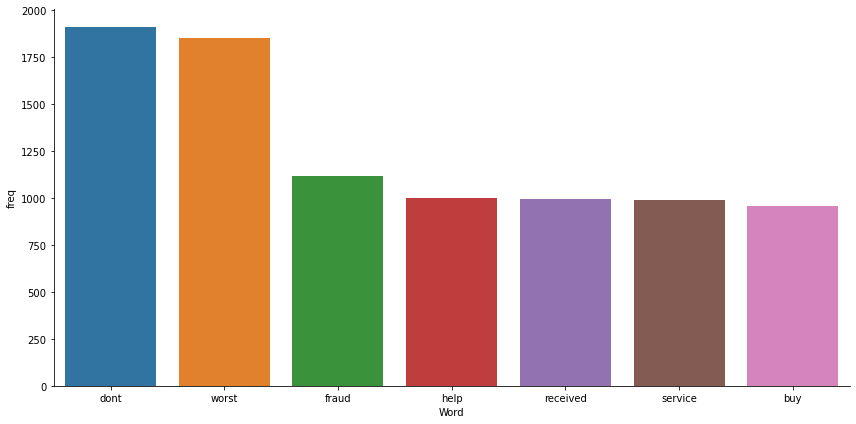

In [98]:
import seaborn as sns
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [94]:
tdm1.head(5)

,Word,freq
176,dont,1913
756,worst,1851
242,fraud,1120
280,help,1003
513,received,995


In [86]:
full_text=df.full_text[3]
full_text

'still reply response care provider horrible see solution provided yet shameless service'

In [51]:
full_text = " ".join(review for review in df.full_text)
print ("There are {} words in the combination of all review.".format(len(full_text)))

There are 194041 words in the combination of all review.


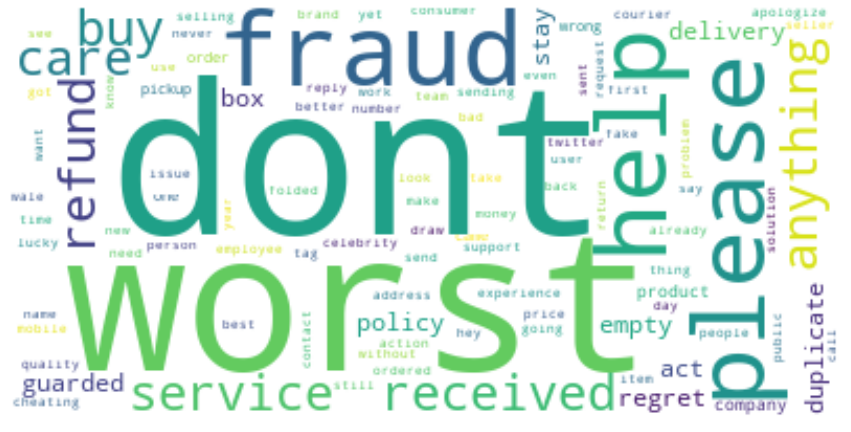

In [52]:
# lower max_font_size, change the maximum number of word and lighten the background:
## collocations=False means try to contro the duplicate keyword and counts as 1
#from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(background_color="white",max_words=100,collocations=False).generate(full_text)
plt.figure(figsize=[15,27])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

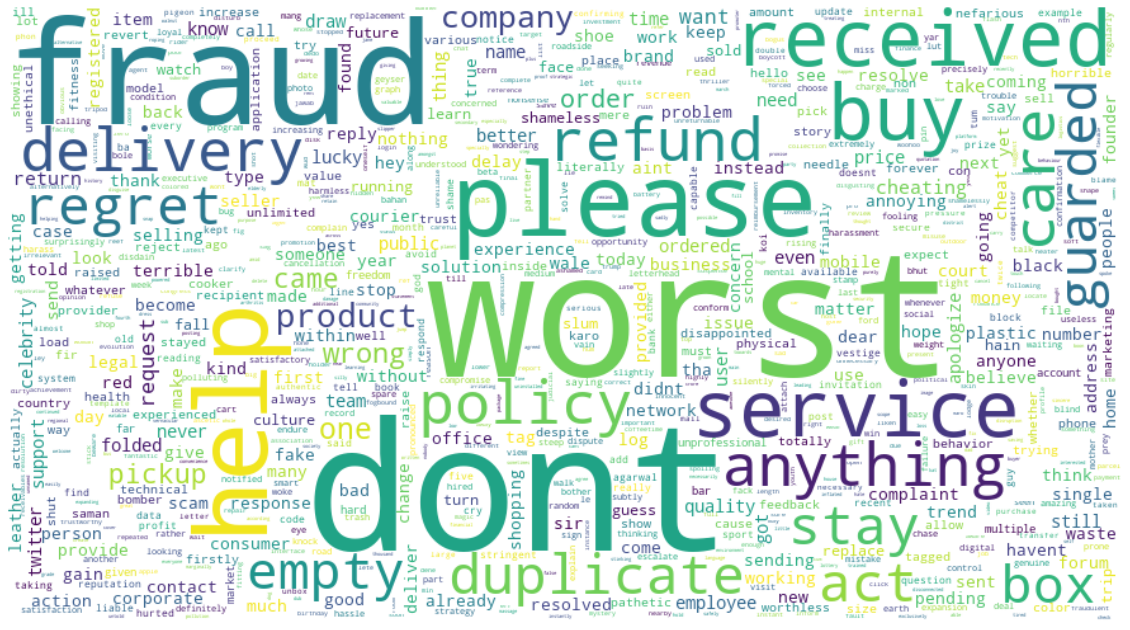

In [53]:
# Generate a word cloud image
from PIL import Image
mask = np.array(Image.open("D:\cloud2.png"))
wordcloud_full = WordCloud(background_color="white",
                          mode="RGBA", max_words=1500,mask=mask,collocations=False).generate(full_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,30])
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()

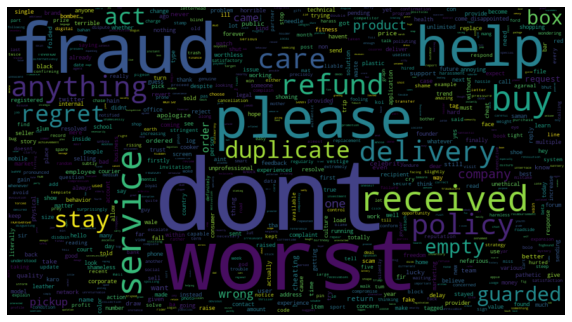

In [54]:
# Generate a word cloud image
mask = np.array(Image.open("D:\cloud2.png"))
wordcloud_full = WordCloud(background_color="black",
                          mode="RGBA", max_words=1500,mask=mask,collocations=False).generate(full_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,20])
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()

In [55]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
df['polarity'] = df['full_text'].apply(pol)
df.head(5)

,full_text,tokenized_words,polarity
0,delivery unbox,"[delivery, unbox]",0.000000
1,serious non technical user quite authentic act...,"[serious, non, technical, user, quite, authent...",0.053333
2,received post mail scratch card home address l...,"[received, post, mail, scratch, card, home, ad...",0.090000
3,still reply response care provider horrible se...,"[still, reply, response, care, provider, horri...",-1.000000
4,contact service help keep sending template don...,"[contact, service, help, keep, sending, templa...",0.000000


In [56]:
df['Sentiment'] = np.where(df['polarity']>=0, 'Positive', 'Negative')

In [57]:
df.head()

,full_text,tokenized_words,polarity,Sentiment
0,delivery unbox,"[delivery, unbox]",0.000000,Positive
1,serious non technical user quite authentic act...,"[serious, non, technical, user, quite, authent...",0.053333,Positive
2,received post mail scratch card home address l...,"[received, post, mail, scratch, card, home, ad...",0.090000,Positive
3,still reply response care provider horrible se...,"[still, reply, response, care, provider, horri...",-1.000000,Negative
4,contact service help keep sending template don...,"[contact, service, help, keep, sending, templa...",0.000000,Positive


<AxesSubplot:>

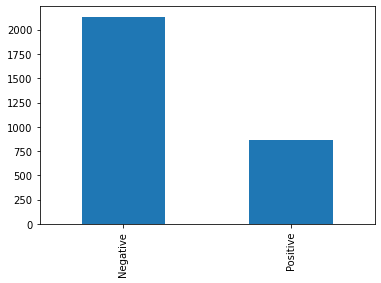

In [58]:
df.Sentiment.value_counts().plot.bar()

In [59]:
df.Sentiment.value_counts()

Negative    2132
Positive     868
Name: Sentiment, dtype: int64

In [60]:
df['Sentiment2'] = np.where(df.polarity< 0, 'Negative',
                           np.where(df.polarity> 0,'Positve', 'Neutral'))

<AxesSubplot:>

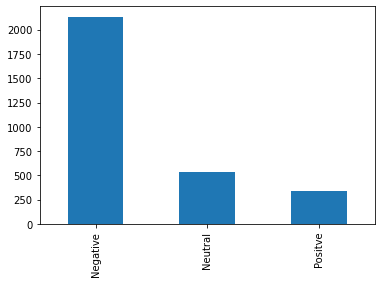

In [61]:
df.Sentiment2.value_counts().plot.bar()

<AxesSubplot:xlabel='Sentiment2'>

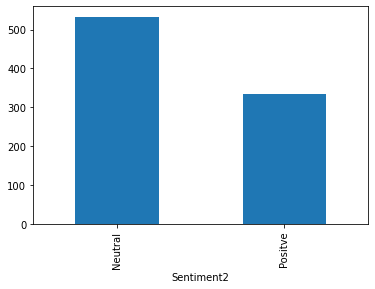

In [62]:
df.groupby("Sentiment2").Sentiment2.count().sort_values(ascending=False)[1:].plot.bar()

In [63]:
df.head()

,full_text,tokenized_words,polarity,Sentiment,Sentiment2
0,delivery unbox,"[delivery, unbox]",0.000000,Positive,Neutral
1,serious non technical user quite authentic act...,"[serious, non, technical, user, quite, authent...",0.053333,Positive,Positve
2,received post mail scratch card home address l...,"[received, post, mail, scratch, card, home, ad...",0.090000,Positive,Positve
3,still reply response care provider horrible se...,"[still, reply, response, care, provider, horri...",-1.000000,Negative,Negative
4,contact service help keep sending template don...,"[contact, service, help, keep, sending, templa...",0.000000,Positive,Neutral


In [64]:
pip install afinn

Note: you may need to restart the kernel to use updated packages.


In [65]:
from afinn import Afinn

In [66]:
#Instantiating Afinn Library
af = Afinn()
#function to perform Afinn Sentiment Analyis
def afinn_sent_analysis(full_text):
  score = af.score(full_text)
  return score

In [67]:
#applying the function to Normalized Comments
df['afinn_score'] = [afinn_sent_analysis(comm) for comm in df['full_text']]


In [68]:
df['Sentiment3'] = np.where(df.afinn_score< 0, 'Negative',
                           np.where(df.afinn_score> 0,'Positve', 'Neutral'))

<AxesSubplot:>

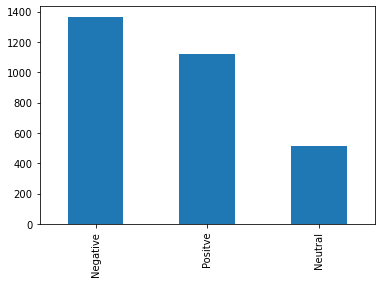

In [69]:
df.Sentiment3.value_counts().plot.bar()